--------------------
#### Kurtosis
- is a statistical measure that quantifies the "tailedness" or the degree of peakedness (or flatness) of a probability distribution compared to the normal distribution. 
- In simpler terms, it measures the presence and extent of outliers or extreme values in a dataset.


In [71]:
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as pltu
import seaborn as sns

In [72]:
from scipy.stats import norm

#### Example

- leptokurtic
- heavy tails
- very positve kurtosis
- sign of outliers

In [73]:
# Set a seed for reproducibility
np.random.seed(42)

In [74]:
# Simulate closing values with increased kurtosis
# Adding more extreme values to make the distribution more leptokurtic
closing_values_high_kurtosis = np.concatenate([
    np.random.normal(50, 5,   1000),   # Frequent occurrences around 50
    np.random.normal(70, 10,  200),    # Less frequent occurrences around 70
    np.random.normal(30, 8,  50),     # Even less frequent occurrences around 30
    np.random.normal(210, 15, 100)     # More extreme values added
])

In [75]:
# Calculate and print the kurtosis for the modified data
kurtosis_high = kurtosis(closing_values_high_kurtosis)
print(f'Kurtosis (High): {kurtosis_high}')

Kurtosis (High): 7.631702561304932


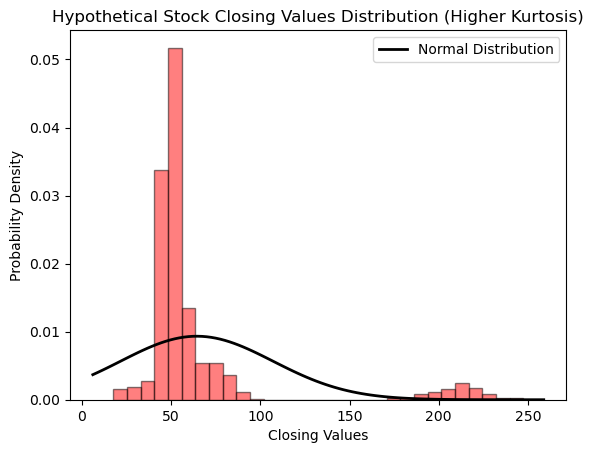

In [76]:
# Plot the histogram
plt.hist(closing_values_high_kurtosis, bins=30, density=True, alpha=0.5, color='red', edgecolor='black')

# Plot the normal distribution PDF for reference
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(closing_values_high_kurtosis), np.std(closing_values_high_kurtosis))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Hypothetical Stock Closing Values Distribution (Higher Kurtosis)')
plt.xlabel('Closing Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#### platykurtic distribution
- where the tails are lighter and the peak is flatter compared to a normal distribution

In [77]:
# Simulate closing values with decreased kurtosis
# Spread out the values to make the distribution more platykurtic
closing_values_low_kurtosis = np.concatenate([
    np.random.normal(50, 15, 1000),     # Frequent occurrences spread around 50
    np.random.normal(70, 20, 10),      # Less frequent occurrences spread around 70
    np.random.normal(30, 12, 5),        # Even less frequent occurrences spread around 30
])

In [78]:
# Calculate and print the kurtosis for the modified data
kurtosis_low = kurtosis(closing_values_low_kurtosis)
print(f'Kurtosis (Low): {kurtosis_low}')

Kurtosis (Low): 0.11454728153248173


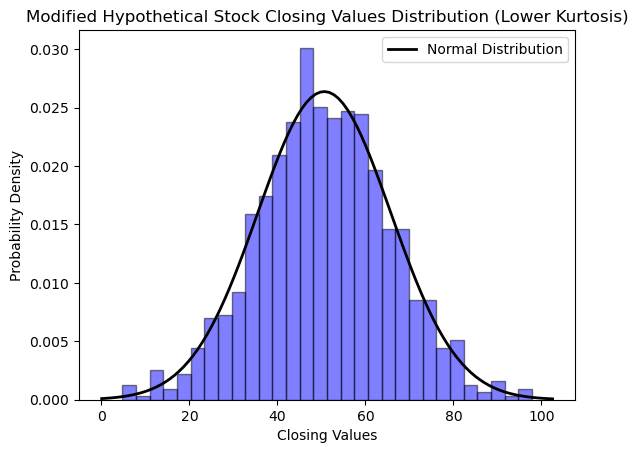

In [79]:
# Plot the histogram
plt.hist(closing_values_low_kurtosis, bins=30, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the normal distribution PDF for reference
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(closing_values_low_kurtosis), np.std(closing_values_low_kurtosis))
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Modified Hypothetical Stock Closing Values Distribution (Lower Kurtosis)')
plt.xlabel('Closing Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

#### let us take CA housing dataset and plot the columns KDE and compute kurtosis

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy.stats import kurtosis

In [81]:
location = r'D:\AI-DATASETS\01-MISC\CA_housing.csv'

In [82]:
df = pd.read_csv(location)

In [83]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12064,-117.58,33.87,34,1511,272.0,773,265,3.5313,INLAND,142100
2290,-119.77,36.80,32,3461,665.0,1507,649,2.9244,INLAND,84600
15215,-117.10,33.00,5,15502,2613.0,7417,2358,5.9094,<1H OCEAN,261100
1056,-121.85,39.77,17,5273,1177.0,2446,1199,1.9362,INLAND,89900
20142,-119.06,34.36,52,1239,320.0,934,298,1.8618,<1H OCEAN,183300


In [84]:
X = df.drop(['ocean_proximity'], axis=1).values
feature_names = df.columns

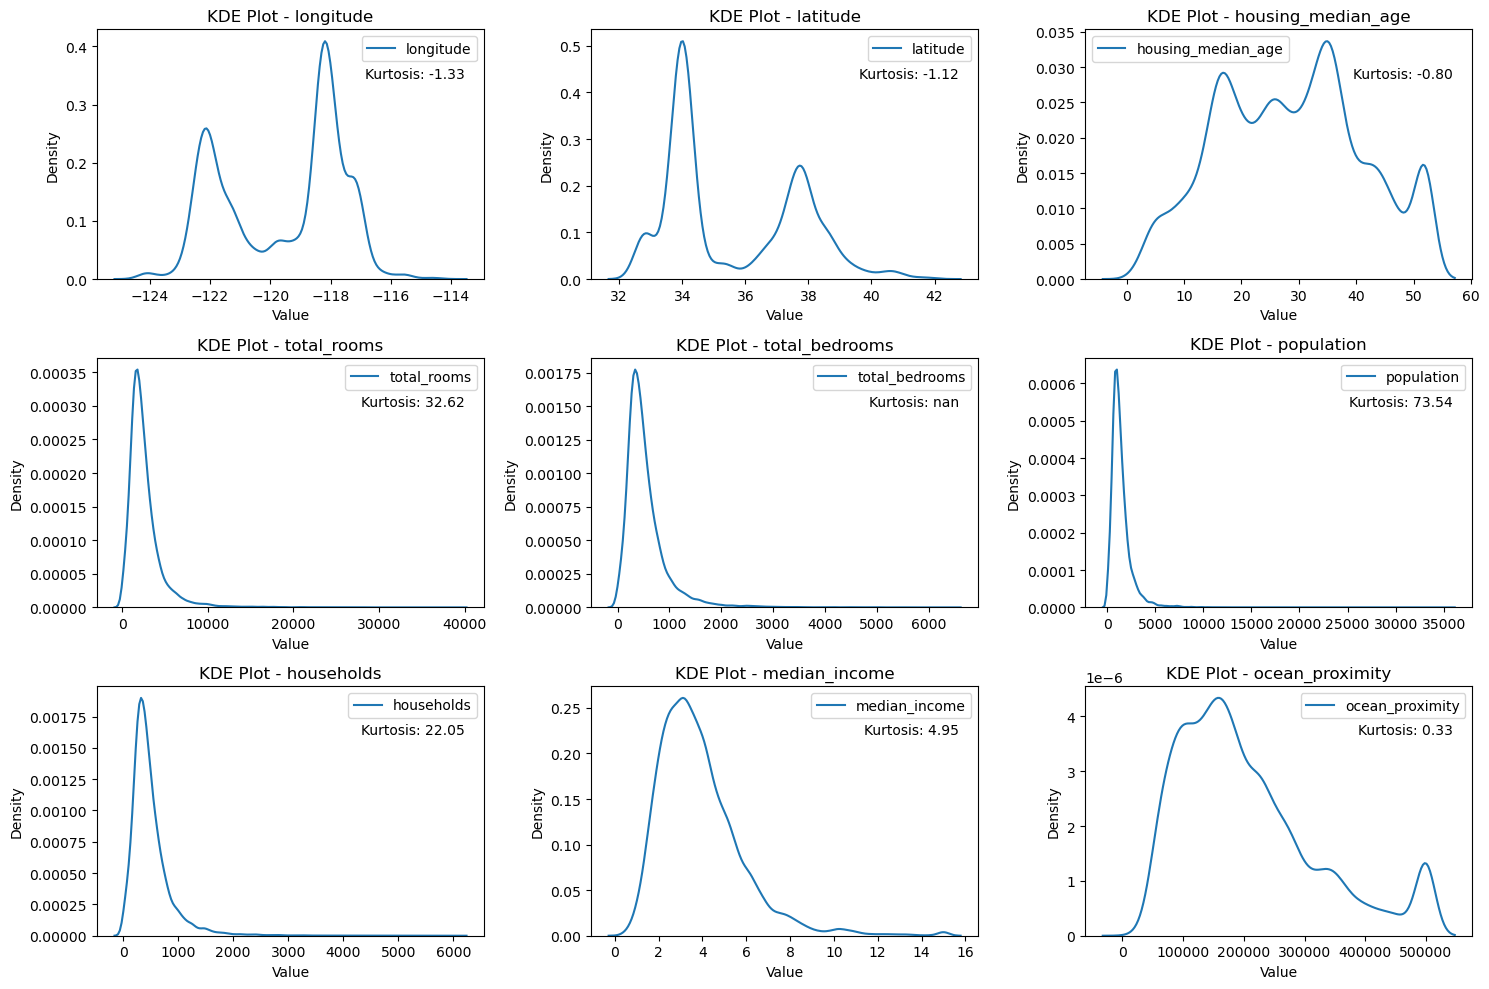

In [85]:
# Create KDE plots and compute kurtosis
plt.figure(figsize=(15, 10))

for i in range(X.shape[1]):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(X[:, i], label=feature_names[i])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('KDE Plot - ' + feature_names[i])
    plt.legend()

    # Compute kurtosis
    kurt = kurtosis(X[:, i])
    plt.text(0.95, 0.85, f'Kurtosis: {kurt:.2f}', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

**MedInc (Median Income):**

- The distribution appears to be positively skewed, which is typical for income data.
- The kurtosis value is likely to be higher than for a normal distribution due to the heavy tail on the right side.

**HouseAge (Median House Age):**

- The distribution shows a peak around the median house age and tails off on both sides.
- The kurtosis value might be slightly higher due to the tails, but it is likely to be relatively close to that of a normal distribution.

**AveRooms (Average Rooms):**

- The distribution appears to be positively skewed with a long tail on the right side.
- The kurtosis value might be higher due to the presence of outliers causing a heavier tail.

**AveBedrms (Average Bedrooms):**

- The distribution is positively skewed, but it also seems to have a peak around lower values.
- The kurtosis value might be influenced by the heavier tail on the right side and the peak on the left side.

**Population:**

- The distribution shows a peak around lower population values and tails off on the right side.
- The kurtosis value might be slightly higher due to the tails and the potential presence of outliers.

**AveOccup (Average Occupancy):**

- The distribution is heavily skewed to the right, with a long tail.
- The kurtosis value is likely to be significantly higher due to the very heavy tail.


####  Breast Cancer Wisconsin (Diagnostic) dataset (commonly known as the "breast cancer dataset") 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from scipy.stats import kurtosis

In [23]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, feature_names = data.data, data.feature_names

In [25]:
#print(data.DESCR)

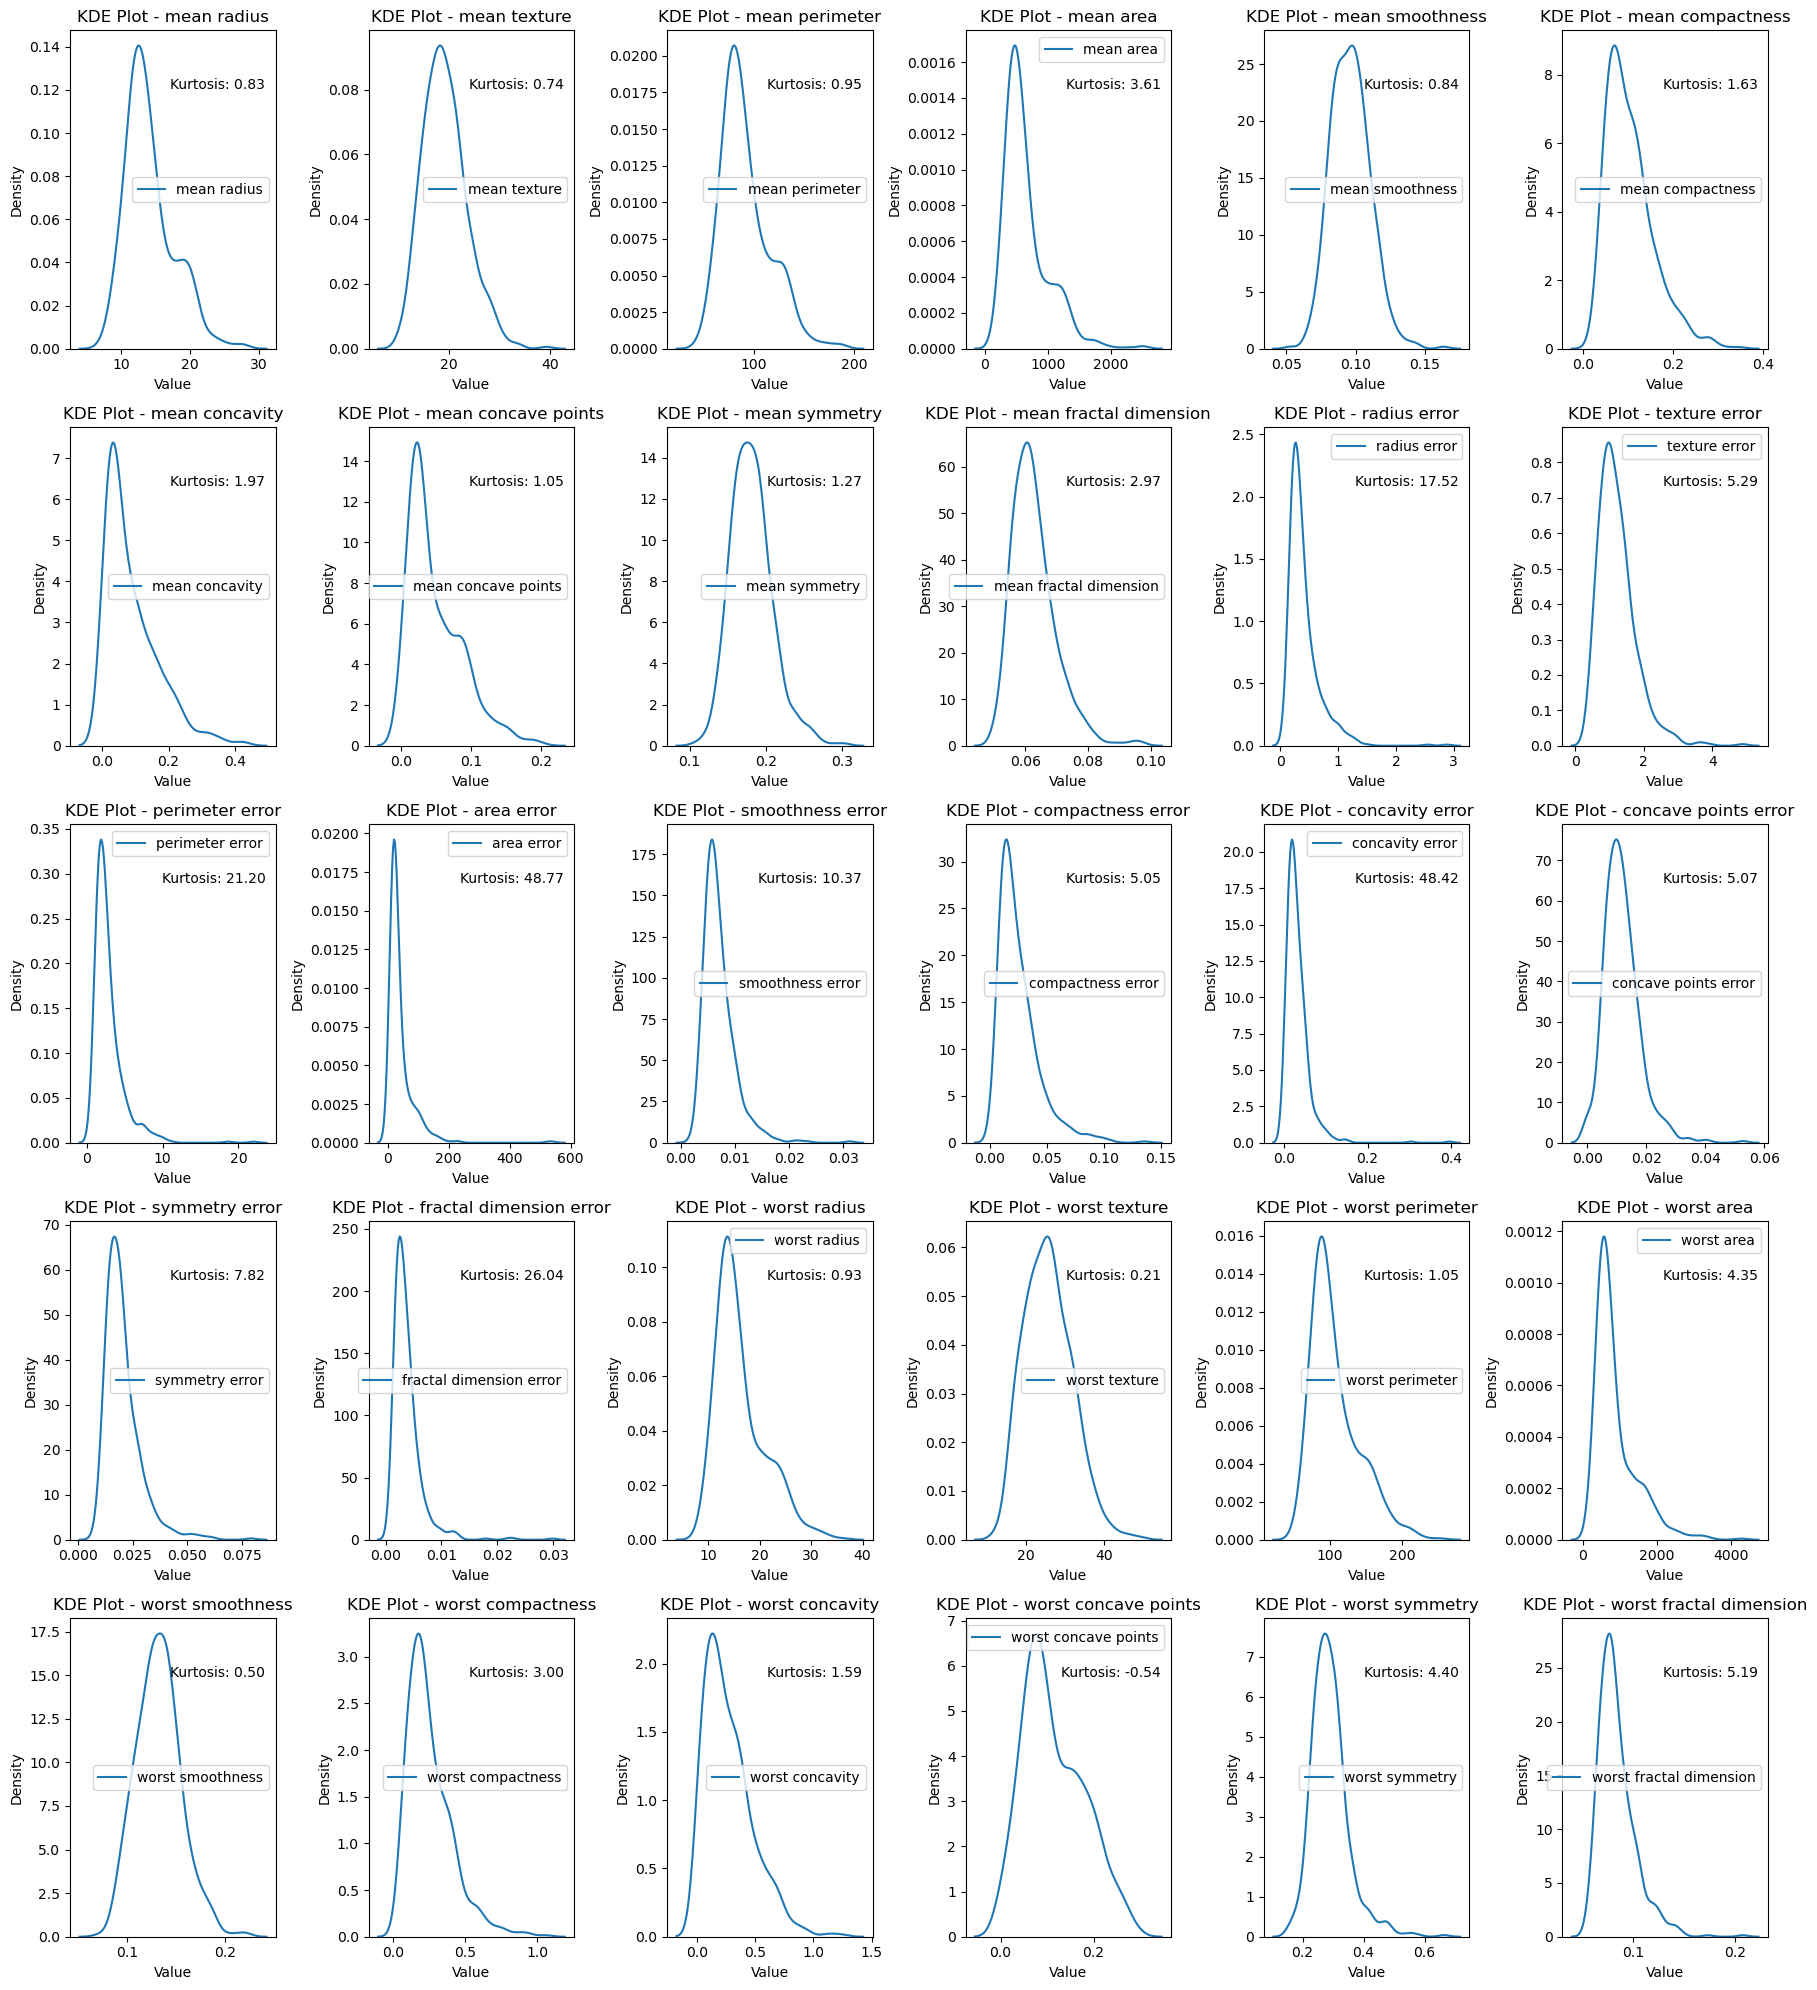

In [26]:
# Create KDE plots and compute kurtosis
plt.figure(figsize=(18, 20))

for i in range(X.shape[1]):
    plt.subplot(5, 6, i + 1)  # Adjust this for the number of features
    sns.kdeplot(X[:, i], label=feature_names[i])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('KDE Plot - ' + feature_names[i])
    plt.legend()

    # Compute kurtosis
    kurt = kurtosis(X[:, i])
    plt.text(0.95, 0.85, f'Kurtosis: {kurt:.2f}', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

##### top 3 columns that are likely to have extreme values

 Higher kurtosis values often indicate the presence of heavy tails and potential extreme values.

In [26]:
# Load the breast cancer dataset
data = load_breast_cancer()
X, feature_names = data.data, data.feature_names

# Compute kurtosis for each column
kurtosis_values = [kurtosis(X[:, i]) for i in range(X.shape[1])]

# Sort columns by kurtosis values
sorted_indices = np.argsort(kurtosis_values)[::-1]

# Get the top 3 columns with the highest kurtosis values
top_indices = sorted_indices[:3]
top_columns = [feature_names[i] for i in top_indices]

print("Top 3 columns likely to have extreme values:")
for i, column in enumerate(top_columns, start=1):
    print(f"{i}. {column} (Kurtosis: {kurtosis_values[feature_names.tolist().index(column)]:.2f})")

Top 3 columns likely to have extreme values:
1. area error (Kurtosis: 48.77)
2. concavity error (Kurtosis: 48.42)
3. fractal dimension error (Kurtosis: 26.04)
